# Read mbd_dataset

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#!pip install access_parser

In [3]:
!dir v1

 Volume in drive C is Windows
 Volume Serial Number is F02D-AD2D

 Directory of c:\Users\ahmm9\Documents\GitHub\Thesis_Rep_similarity\WIP



File Not Found


In [4]:
import pandas as pd
import numpy as np
import torch

from torcheeg.io.eeg_signal import EEGSignalIO

## Path to dir with data (remember the last '/')
#path = "/eeg_data/BNCI2014-001/"
path = "C:/Users/ahmm9/Desktop/v1/"

## Establish connection to datafile
IO = EEGSignalIO(io_path=str(path), io_mode='lmdb')

## Read metadata dataframe
metadata = pd.read_csv(path + 'sample_metadata.tsv', sep='\t')

idxs = np.arange(len(metadata))

eeg = torch.FloatTensor(np.array([IO.read_eeg(str(i)) for i in idxs]))
print(eeg.shape)

torch.Size([111762, 32, 400])


In [5]:
sample_meta = pd.read_csv(path+"sample_metadata.tsv", sep ="\t")

newdf = sample_meta.sort_values("arousal")
newdf

,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx
27274,646,2,20,positive,inspiration,30,0,0,2,3.666683,...,0.007178,0.031274,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,26
107031,3275,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,21
107032,3277,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,22
107033,3279,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,23
107034,3281,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,4061,2,6,negative,disgust,82,0,0,28,0.087500,...,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,31
75448,4063,2,6,negative,disgust,82,0,0,28,0.087500,...,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,32
75449,4065,2,6,negative,disgust,82,0,0,28,0.087500,...,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,33
92370,2184,2,1,negative,anger,101,0,0,16,0.408333,...,0.262500,6.504167,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,16


In [6]:
emotion_mapping = {
    'sadness': 0, 'tenderness': 1, 'anger': 2, 'amusement': 3, 'joy': 4,
    'fear': 5, 'neutral': 6, 'disgust': 7, 'inspiration': 8
}

stim_valence_mapping = {
    'negative': 0, 'neutral': 1, 'positive': 2
}

# Apply mappings
newdf["emotion_encoded"] = newdf["emotion"].map(emotion_mapping)
newdf["stim_valence_encoded"] = newdf["stim_valence"].map(stim_valence_mapping)

# Print result
newdf


,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx,emotion_encoded,stim_valence_encoded
27274,646,2,20,positive,inspiration,30,0,0,2,3.666683,...,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,26,8,2
107031,3275,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,21,5,0
107032,3277,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,22,5,0
107033,3279,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,23,5,0
107034,3281,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,24,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,4061,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,31,7,0
75448,4063,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,32,7,0
75449,4065,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,33,7,0
92370,2184,2,1,negative,anger,101,0,0,16,0.408333,...,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,16,2,0


In [7]:
newdf.shape[0]/3
class_1 = newdf[0:37254]
class_2 = newdf[37254:37254*2]
class_3 = newdf[37254*2:]


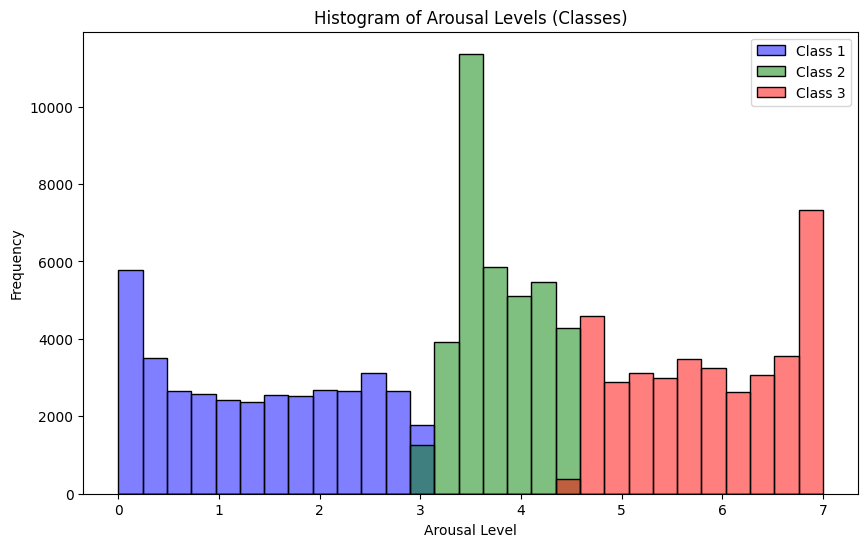

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split the dataset into three equal parts
split_size = newdf.shape[0] // 3
class_1 = newdf.iloc[:split_size]
class_2 = newdf.iloc[split_size:split_size*2]
class_3 = newdf.iloc[split_size*2:]

# Define equal bin edges based on the global min/max of arousal
arousal_min = newdf["arousal"].min()
arousal_max = newdf["arousal"].max()
bin_edges = np.linspace(arousal_min, arousal_max, num=30)  # Adjust num for bin count

# Plot histograms with the same bin edges
plt.figure(figsize=(10, 6))

sns.histplot(class_1["arousal"], bins=bin_edges, color='blue', alpha=0.5, label="Class 1")
sns.histplot(class_2["arousal"], bins=bin_edges, color='green', alpha=0.5, label="Class 2")
sns.histplot(class_3["arousal"], bins=bin_edges, color='red', alpha=0.5, label="Class 3")

# Formatting
plt.xlabel("Arousal Level")
plt.ylabel("Frequency")
plt.title("Histogram of Arousal Levels (Classes)")
plt.legend()
plt.show()


In [9]:
newdf

,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx,emotion_encoded,stim_valence_encoded
27274,646,2,20,positive,inspiration,30,0,0,2,3.666683,...,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,26,8,2
107031,3275,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,21,5,0
107032,3277,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,22,5,0
107033,3279,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,23,5,0
107034,3281,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,24,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,4061,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,31,7,0
75448,4063,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,32,7,0
75449,4065,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,33,7,0
92370,2184,2,1,negative,anger,101,0,0,16,0.408333,...,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,16,2,0


In [10]:
newdf.columns

Index(['onset', 'duration', 'video', 'stim_valence', 'emotion', 'subject',
       'session', 'run', 'trial', 'joy', 'tenderness', 'inspiration',
       'amusement', 'anger', 'disgust', 'fear', 'sadness', 'arousal',
       'valence', 'familiarity', 'liking', 'window_idx', 'emotion_encoded',
       'stim_valence_encoded'],
      dtype='object')

In [11]:
kept_newdf = newdf[["subject","joy", "tenderness", "inspiration", "amusement", "anger", "disgust", "fear", "sadness", 
                    "arousal", "valence", "familiarity", "liking", "emotion_encoded", "stim_valence_encoded"]]

kept_newdf

,subject,joy,tenderness,inspiration,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,emotion_encoded,stim_valence_encoded
27274,30,3.666683,0.025663,3.615470,0.007178,0.031274,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,8,2
107031,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107032,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107033,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107034,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,82,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
75448,82,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
75449,82,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
92370,101,0.408333,0.284375,0.218750,0.262500,6.504167,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,2,0


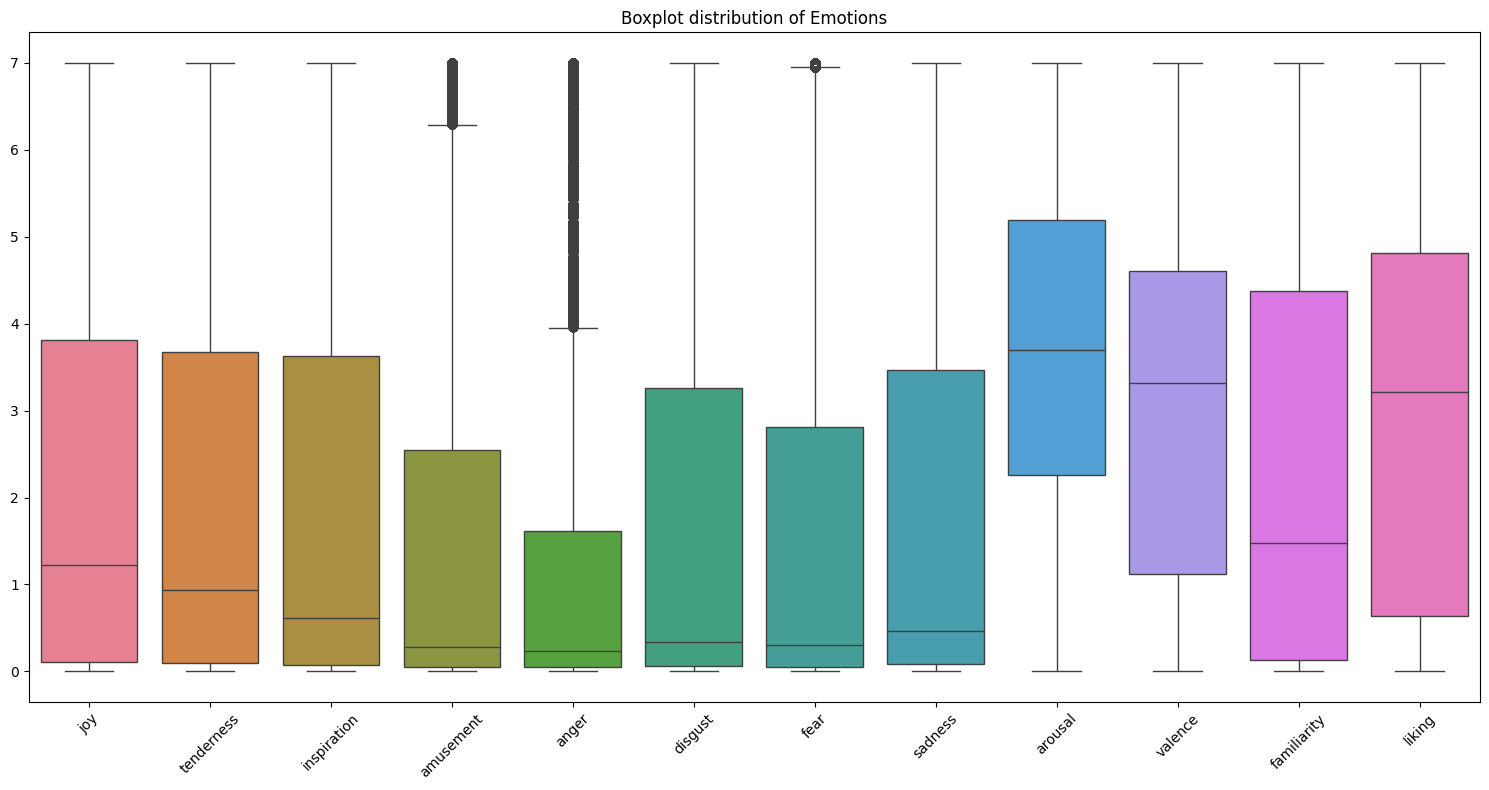

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the desired columns (excluding encoded columns)
boxplot_vars = kept_newdf.drop(columns=["subject","emotion_encoded", "stim_valence_encoded"])

# Plot boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=boxplot_vars)
plt.xticks(rotation=45)
plt.title("Boxplot distribution of Emotions")
plt.tight_layout()
plt.show()


In [13]:
for i in kept_newdf.columns:
    max = np.max(kept_newdf[i].values)
    min = np.min(kept_newdf[i].values)
    print(f"{i} :", max, min)

subject : 122 0
joy : 7.0 0.0
tenderness : 7.0 0.0
inspiration : 7.0 0.0
amusement : 7.0 0.0
anger : 7.0 0.0
disgust : 7.0 0.0
fear : 7.0 0.0
sadness : 7.0 0.0
arousal : 7.0 0.0
valence : 7.0 0.0
familiarity : 7.0 0.0
liking : 7.0 0.0
emotion_encoded : 8 0
stim_valence_encoded : 2 0


In [14]:
print("emotion_encoded", set(newdf["emotion_encoded"].values))
print("stim_valence_encoded", set(newdf["stim_valence_encoded"].values))

emotion_encoded {0, 1, 2, 3, 4, 5, 6, 7, 8}
stim_valence_encoded {0, 1, 2}


In [15]:
kept_newdf

,subject,joy,tenderness,inspiration,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,emotion_encoded,stim_valence_encoded
27274,30,3.666683,0.025663,3.615470,0.007178,0.031274,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,8,2
107031,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107032,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107033,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107034,117,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,82,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
75448,82,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
75449,82,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
92370,101,0.408333,0.284375,0.218750,0.262500,6.504167,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,2,0


In [16]:
import pandas as pd

# Split new_merged_df into 3 classes while preserving index
three_classes = kept_newdf.shape[0] // 3
class_1_m = kept_newdf.iloc[0:three_classes].copy()
class_2_m = kept_newdf.iloc[three_classes:three_classes*2].copy()
class_3_m = kept_newdf.iloc[three_classes*2:].copy()

# Create y_label lists
one_list = [1] * class_1_m.shape[0]
two_list = [2] * class_2_m.shape[0]
three_list = [3] * class_3_m.shape[0]

# Assign labels
class_1_m['y_label'] = one_list
class_2_m['y_label'] = two_list
class_3_m['y_label'] = three_list

# Concatenate while preserving original index
combined_df = pd.concat([class_1_m, class_2_m, class_3_m])

# Ensure the index matches the original dataset
assert all(combined_df.index == kept_newdf.index)

# Print check
print(combined_df.head())


        subject       joy  tenderness  inspiration  amusement     anger  \
27274        30  3.666683    0.025663      3.61547   0.007178  0.031274   
107031      117  0.065625    0.021875      0.00000   0.000000  1.400000   
107032      117  0.065625    0.021875      0.00000   0.000000  1.400000   
107033      117  0.065625    0.021875      0.00000   0.000000  1.400000   
107034      117  0.065625    0.021875      0.00000   0.000000  1.400000   

         disgust      fear   sadness  arousal   valence  familiarity  \
27274   0.026860  0.019055  0.024154      0.0  3.479179      0.00977   
107031  6.992708  6.992708  7.000000      0.0  0.000000      0.00000   
107032  6.992708  6.992708  7.000000      0.0  0.000000      0.00000   
107033  6.992708  6.992708  7.000000      0.0  0.000000      0.00000   
107034  6.992708  6.992708  7.000000      0.0  0.000000      0.00000   

          liking  emotion_encoded  stim_valence_encoded  y_label  
27274   3.326880                8                

In [17]:
combined_df_sort =combined_df.sort_index()
combined_df_sort

,subject,joy,tenderness,inspiration,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,emotion_encoded,stim_valence_encoded,y_label
0,0,0.162496,3.575964,0.224931,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,0,0,2
1,0,0.162496,3.575964,0.224931,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,0,0,2
2,0,0.162496,3.575964,0.224931,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,0,0,2
3,0,0.162496,3.575964,0.224931,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,0,0,2
4,0,0.162496,3.575964,0.224931,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111757,122,6.788542,6.825000,6.825000,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,1,2,3
111758,122,6.788542,6.825000,6.825000,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,1,2,3
111759,122,6.788542,6.825000,6.825000,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,1,2,3
111760,122,6.788542,6.825000,6.825000,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,1,2,3


<Figure size 1500x600 with 0 Axes>

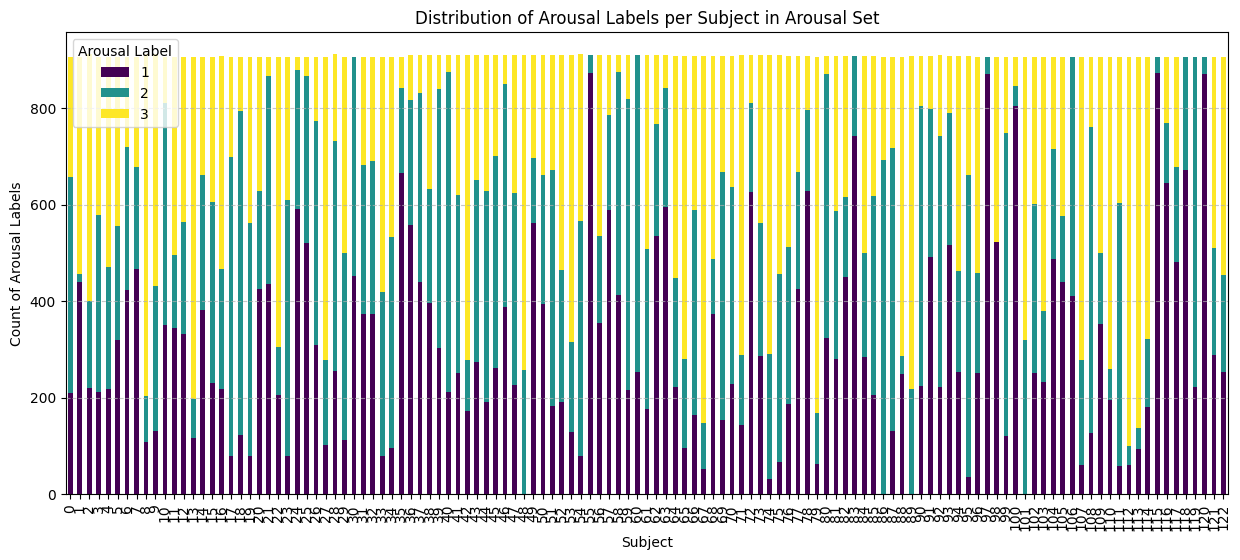

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each arousal label per subject
subject_arousal_counts = combined_df_sort.groupby(['subject', 'y_label']).size().unstack()

# Plot the distribution
plt.figure(figsize=(15, 6))
subject_arousal_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 6))

# Labels and title
plt.xlabel("Subject")
plt.ylabel("Count of Arousal Labels")
plt.title("Distribution of Arousal Labels per Subject in Arousal Set")
plt.legend(title="Arousal Label")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [19]:
# Get unique subjects¨
from sklearn.model_selection import train_test_split

# Split randomly at the row level
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42, stratify=combined_df['y_label'])

# Check class distribution
print(train_df['y_label'].value_counts(normalize=True))  # Should be balanced
print(test_df['y_label'].value_counts(normalize=True))   # Should be balanced



y_label
2    0.333333
1    0.333333
3    0.333333
Name: proportion, dtype: float64
y_label
3    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


In [20]:
subject_set = set(train_df["subject"].values)
print(len(list(subject_set)))
print(subject_set)
subjects = set(list(combined_df["subject"]))
print(subjects)

123
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,

In [21]:
not_in_train = list(set(subjects).difference(subject_set))
print(not_in_train)

[]


In [22]:
from collections import defaultdict, Counter
unique_vals = defaultdict(list)
for i in list(subject_set):

    number_1 = train_df[train_df["subject"]==1]
    Counting = Counter(number_1["y_label"].values)
    unique_vals[i] = Counting
print(unique_vals)

defaultdict(<class 'list'>, {0: Counter({3: 355, 1: 350, 2: 14}), 1: Counter({3: 355, 1: 350, 2: 14}), 2: Counter({3: 355, 1: 350, 2: 14}), 3: Counter({3: 355, 1: 350, 2: 14}), 4: Counter({3: 355, 1: 350, 2: 14}), 5: Counter({3: 355, 1: 350, 2: 14}), 6: Counter({3: 355, 1: 350, 2: 14}), 7: Counter({3: 355, 1: 350, 2: 14}), 8: Counter({3: 355, 1: 350, 2: 14}), 9: Counter({3: 355, 1: 350, 2: 14}), 10: Counter({3: 355, 1: 350, 2: 14}), 11: Counter({3: 355, 1: 350, 2: 14}), 12: Counter({3: 355, 1: 350, 2: 14}), 13: Counter({3: 355, 1: 350, 2: 14}), 14: Counter({3: 355, 1: 350, 2: 14}), 15: Counter({3: 355, 1: 350, 2: 14}), 16: Counter({3: 355, 1: 350, 2: 14}), 17: Counter({3: 355, 1: 350, 2: 14}), 18: Counter({3: 355, 1: 350, 2: 14}), 19: Counter({3: 355, 1: 350, 2: 14}), 20: Counter({3: 355, 1: 350, 2: 14}), 21: Counter({3: 355, 1: 350, 2: 14}), 22: Counter({3: 355, 1: 350, 2: 14}), 23: Counter({3: 355, 1: 350, 2: 14}), 24: Counter({3: 355, 1: 350, 2: 14}), 25: Counter({3: 355, 1: 350, 2:

<Figure size 1500x600 with 0 Axes>

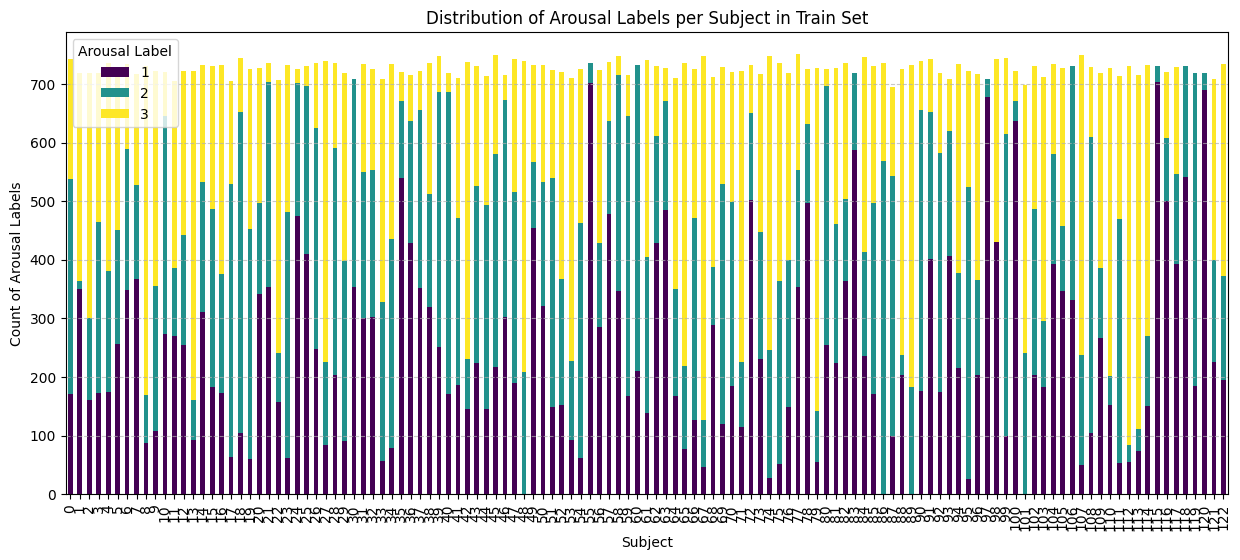

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each arousal label per subject
subject_arousal_counts = train_df.groupby(['subject', 'y_label']).size().unstack()

# Plot the distribution
plt.figure(figsize=(15, 6))
subject_arousal_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 6))

# Labels and title
plt.xlabel("Subject")
plt.ylabel("Count of Arousal Labels")
plt.title("Distribution of Arousal Labels per Subject in Train Set")
plt.legend(title="Arousal Label")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


<Figure size 1500x600 with 0 Axes>

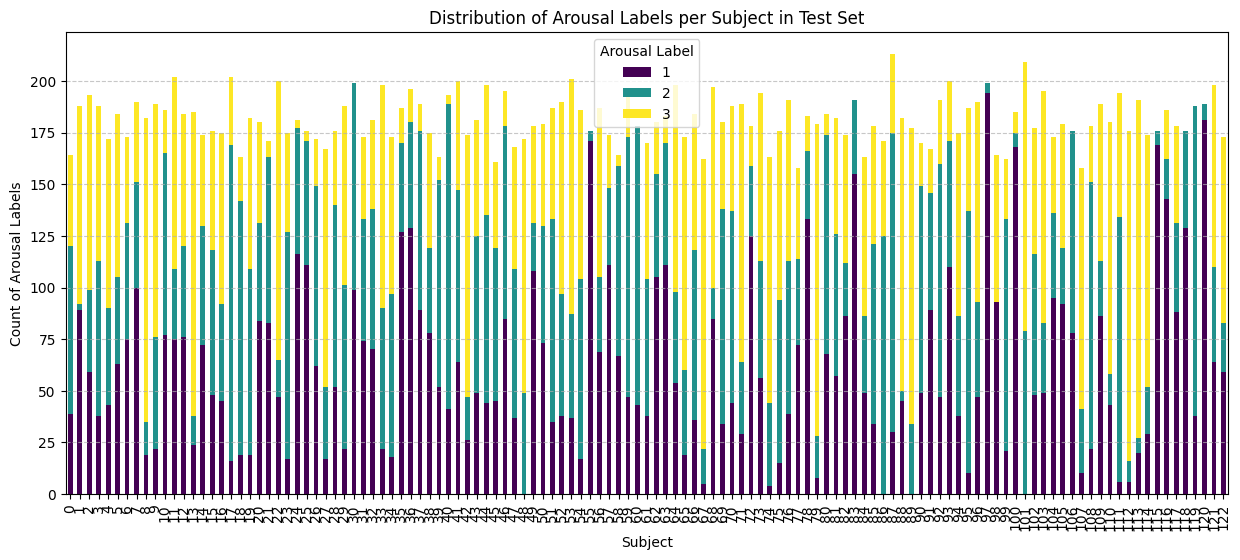

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each arousal label per subject
subject_arousal_counts_test = test_df.groupby(['subject', 'y_label']).size().unstack()

# Plot the distribution
plt.figure(figsize=(15, 6))
subject_arousal_counts_test.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 6))

# Labels and title
plt.xlabel("Subject")
plt.ylabel("Count of Arousal Labels")
plt.title("Distribution of Arousal Labels per Subject in Test Set")
plt.legend(title="Arousal Label")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [25]:
train_indices_df = pd.DataFrame(list(train_df.index), columns=['index'])
test_indices_df = pd.DataFrame(list(test_df.index), columns=['index'])

# Save to CSV
#train_indices_df.to_csv("train_indices.csv", index=False)
#test_indices_df.to_csv("test_indices.csv", index=False)

In [26]:
train_indeces_reread = pd.read_csv("train_indices.csv")
test_indeces_reread = pd.read_csv("test_indices.csv")

In [27]:
test_indeces_reread

,index
0,104347
1,27761
2,28956
3,76367
4,11960
...,...
22348,9831
22349,47721
22350,44666
22351,88175


In [28]:
len(test_indeces_reread.index)

22353

In [29]:
test_index_list = []
train_index_list = []
for i_train in train_indeces_reread.values:

    train_index_list.append(i_train[0])
#print(test_index_list)

for i_test in test_indeces_reread.values:
    #print(i[0])
    test_index_list.append(i_test[0])

new_train_df = combined_df.iloc[train_index_list]
new_test_df = combined_df.iloc[test_index_list]
print(len(train_index_list))
print(len(test_index_list))

89409
22353


In [31]:
# Get the indices for each class
def eeg_tensor_and_y_label(dataframe):
    class_y_label_1 = dataframe[dataframe['y_label']==1] #= one_list
    class_y_label_2 = dataframe[dataframe['y_label']==2] #= one_list
    class_y_label_3 = dataframe[dataframe['y_label']==3] #= one_list
    #class_2_m['y_label'] = two_list
    #class_3_m['y_label'] = three_list



    idx_class_1 = class_y_label_1.index.values
    idx_class_2 = class_y_label_2.index.values
    idx_class_3 = class_y_label_3.index.values

    # Use these indices to extract the corresponding EEG tensors
    eeg_class_1 = eeg[idx_class_1]
    eeg_class_2 = eeg[idx_class_2]
    eeg_class_3 = eeg[idx_class_3]
    # Step 1: Create label arrays
    labels_class_1 = [0] * eeg_class_1.shape[0]
    labels_class_2 = [1] * eeg_class_2.shape[0]
    labels_class_3 = [2] * eeg_class_3.shape[0]



    # Assuming we have corresponding index lists for each dataset

    # Step 2: Combine tensors and labels into list of tuples (tensor, label)
    dataset_class_1 = [(eeg_class_1[i], labels_class_1[i]) for i in range(eeg_class_1.shape[0])]
    dataset_class_2 = [(eeg_class_2[i], labels_class_2[i]) for i in range(eeg_class_2.shape[0])]
    dataset_class_3 = [(eeg_class_3[i], labels_class_3[i]) for i in range(eeg_class_3.shape[0])]

    dataset_mapping = {} 
    # Convert lists into a dictionary using their indexes
    dataset_mapping.update(dict(zip(idx_class_1, dataset_class_1)))
    dataset_mapping.update(dict(zip(idx_class_2, dataset_class_2)))
    dataset_mapping.update(dict(zip(idx_class_3, dataset_class_3)))

    # Retrieve samples in the exact order of dataframe.index
    full_dataset = [dataset_mapping[idx] for idx in dataframe.index if idx in dataset_mapping]

    return full_dataset

    # Step 3: Check
    print(len(dataset_class_1))
    print(len(dataset_class_2))
    print(len(dataset_class_3))
    print(len(full_dataset))
    return full_dataset


train_tensor = eeg_tensor_and_y_label(new_train_df)
test_tensor = eeg_tensor_and_y_label(new_test_df)

torch.save(train_tensor, "emotion_train_set.pt")
torch.save(test_tensor, "emotion_test_set.pt")



RuntimeError: [enforce fail at alloc_cpu.cpp:115] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1527705600 bytes.

In [ ]:
for i in range(len(test_tensor)):
    print(test_tensor[i][1])

In [ ]:
from collections import defaultdict
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np
# Define a method for training one epoch
from torch.nn import Module
from torch.optim.lr_scheduler import LRScheduler
from torch.utils.data import DataLoader



def train_one_epoch(
        dataloader: DataLoader, model: Module, loss_fn, optimizer,
        scheduler: LRScheduler, epoch: int, device, print_batch_stats=True
):
    model.train()  # Set the model to training mode
    train_loss, correct = 0, 0

    progress_bar = tqdm(enumerate(dataloader), total=len(dataloader),
                        disable=not print_batch_stats)

    for batch_idx, (X, y) in progress_bar:
        X, y = X.to(device), y.to(device)
        #print(X.shape)
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()  # update the model weights
        optimizer.zero_grad()

        train_loss += loss.item()
        correct += (pred.argmax(1) == y).sum().item()

        #if print_batch_stats:
        #    progress_bar.set_description(
        #        f"Epoch {epoch}/{n_epochs}, "
        #        f"Batch {batch_idx + 1}/{len(dataloader)}, "
        #        f"Loss: {loss.item():.6f}"
        #    )

    # Update the learning rate
    scheduler.step()

    correct /= len(dataloader.dataset)
    return train_loss / len(dataloader), correct


In [ ]:
from collections import defaultdict
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np

@torch.no_grad()
def test_model(dataloader: DataLoader, model: torch.nn.Module, loss_fn, print_batch_stats=True):
    device = next(model.parameters()).device  # Get model device
    size = len(dataloader.dataset)
    n_batches = len(dataloader)
    model.eval()  # Switch to evaluation mode
    test_loss, correct = 0, 0

    # Initialize dictionaries for per-class tracking
    class_correct = defaultdict(int)
    class_total = defaultdict(int)

    # Lists to store true and predicted labels for confusion matrix
    all_preds = []
    all_targets = []

    if print_batch_stats:
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader))
    else:
        progress_bar = enumerate(dataloader)

    for batch_idx, (X, y) in progress_bar:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        batch_loss = loss_fn(pred, y).item()

        test_loss += batch_loss
        correct += (pred.argmax(1) == y).sum().item()

        # Store predictions and true labels for confusion matrix
        all_preds.append(pred.argmax(1).cpu())
        all_targets.append(y.cpu())

        # Compute per-class accuracy
        preds_labels = pred.argmax(1)
        for label, pred_label in zip(y, preds_labels):
            class_total[label.item()] += 1
            class_correct[label.item()] += (label == pred_label).item()

        if print_batch_stats:
            progress_bar.set_description(
                f"Batch {batch_idx + 1}/{len(dataloader)}, Loss: {batch_loss:.6f}"
            )

    # Convert lists to tensors
    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    # Compute per-class accuracy
    class_accuracies = {
        cls: (class_correct[cls] / class_total[cls]) * 100 if class_total[cls] > 0 else 0
        for cls in class_total
    }

    # Compute overall accuracy
    test_loss /= n_batches
    overall_accuracy = (correct / size) * 100

    # Print per-class accuracy
    #print("\nClass-wise Accuracy:")
    #for cls, acc in class_accuracies.items():
    #    print(f"  Class {cls}: {acc:.2f}%")

    #print(f"Test Accuracy: {overall_accuracy:.1f}%, Test Loss: {test_loss:.6f}\n")

    return test_loss, overall_accuracy, class_accuracies, all_preds, all_targets


In [ ]:
#!dir ..\

In [ ]:
cuda = torch.cuda.is_available()  # check if GPU is available, if True chooses to use it
device = "cuda" if cuda else "cpu"
if cuda:
    torch.backends.cudnn.benchmark = True

In [ ]:
#eeg.shape[1]

In [ ]:
from collapsed_shallow_fbscp import ShallowFBCSPNet


import collapsed_shallow_fbscp
import importlib
importlib.reload(collapsed_shallow_fbscp)
# Now you can access the updated class
from collapsed_shallow_fbscp import ShallowFBCSPNet

model = ShallowFBCSPNet(
    n_chans=eeg.shape[1],
    n_subjs=9,
    n_outputs=3,
    n_times=eeg.shape[2],
    #final_conv_length="auto",
    #edge_index = adjacency_matrix
)

# Display torchinfo table describing the model
print(model)

# Send model to GPU
if cuda:
    model.cuda()

# 

In [ ]:
import torch
import wandb
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.nn import CrossEntropyLoss
import numpy as np

# Initialize Weights & Biases
wandb.init(project="Master Thesis", name="ShallowFBCSPNet Accuracy")

# Define hyperparameters
lr = 0.0001
weight_decay = 1e-4
batch_size = 124  # Start with 124
n_epochs = 20

# Log hyperparameters to wandb
wandb.config.update({
    "learning_rate": lr,
    "weight_decay": weight_decay,
    "batch_size": batch_size,
    "epochs": n_epochs
})

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs - 1)

# Define loss function
loss_fn = CrossEntropyLoss()

# Create DataLoaders
train_loader = DataLoader(train_tensor, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=batch_size)

# Initialize lists to store all predictions & targets
all_preds, all_targets = [], []

# Training loop
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}: ", end="")

    train_loss, train_accuracy = train_one_epoch(
        train_loader, model, loss_fn, optimizer, scheduler, epoch, device
    )

    test_loss, test_accuracy, class_accuracies, batch_preds, batch_targets = test_model(test_loader, model, loss_fn)

    # Store predictions & labels for confusion matrix
    all_preds.extend(batch_preds)
    all_targets.extend(batch_targets)

    # Print class-wise accuracy
    print("\nClass-wise Accuracy:")
    for class_idx, acc in class_accuracies.items():
        print(f"  Class {class_idx}: {acc:.2f}%")

    # Log results to wandb
    wandb.log({
        "epoch": epoch,
        "train_loss": train_loss,
        "train_accuracy": train_accuracy * 100,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy,
        "learning_rate": scheduler.get_last_lr()[0],
        **{f"class_{class_idx}_accuracy": acc for class_idx, acc in class_accuracies.items()}
    })

    print(
        f"Train Accuracy: {100 * train_accuracy:.2f}%, "
        f"Average Train Loss: {train_loss:.6f}, "
        f"Test Accuracy: {test_accuracy:.2f}%, "
        f"Average Test Loss: {test_loss:.6f}\n"
    )

# Convert lists to NumPy arrays
all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

# Save predictions & true labels for later use (confusion matrix)
wandb.log({"all_preds": all_preds.tolist(), "all_targets": all_targets.tolist()})

wandb.finish()


In [ ]:
import numpy as np
import pandas as pd
import itertools
import scipy.stats as stats  # Corrected import
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Simulate a 4-class dataset
np.random.seed(123)
classes = ["A", "B", "C", "D"]
observed = np.random.choice(classes, 100)  # True labels
predicted = np.random.choice(classes, 100)  # Predicted labels

# Create confusion matrix
cm = confusion_matrix(observed, predicted, labels=classes)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

print("Confusion Matrix:")
print(cm_df)

# Step 2: Classification Report
print("\nClassification Report:")
print(classification_report(observed, predicted, target_names=classes))

# Step 3: Apply One-vs-All (OvA) approach
def epi_tests_ova(cm, target_class, class_labels):
    idx = class_labels.index(target_class)
    
    TP = cm[idx, idx]
    FP = sum(cm[idx, :]) - TP
    FN = sum(cm[:, idx]) - TP
    TN = cm.sum() - (TP + FP + FN)
    
    contingency_table = np.array([[TP, FP], [FN, TN]])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Fixed function call
    
    return {"Class": target_class, "TP": TP, "FP": FP, "FN": FN, "TN": TN, "Chi2": chi2, "p-value": p}

# Apply epi_tests_ova for each class
results = [epi_tests_ova(cm, cls, classes) for cls in classes]

# Step 4: Convert Results into a Summary Table
summary_table = pd.DataFrame(results)

# Round numeric values
summary_table.iloc[:, 1:] = summary_table.iloc[:, 1:].apply(lambda x: np.round(x, 2))

print("\nSummary Table of Metrics:")
print(summary_table)

# Step 5: Export Results to CSV
summary_table.to_csv("multi_class_metrics.csv", index=False)

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

# Add text annotations
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="black")

plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Confusion Matrix")
plt.show()
